<a href="https://colab.research.google.com/github/tushar2411/Almabetter-Data-Science/blob/main/myPlay_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Analysis On Play Store App Reviews**

###In this Data Analysis Project, I will explore and visualize and answer the questions which can generally come to our mind. This is my first Capstone Project in Module-1 provided by Almabetter. I will apply libraries and techniques that whatever i have learned and gain many skills while persuing this course.

###Let's take a look at the data, which consists of two files:

### ***playstore data.csv***: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
### ***user_reviews.csv***: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.
### Before jumping into the data's provided, let me first explain you about the EDA analysis.

# **What is Exploratory Data Analysis?**
### *Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets for patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset and summarize their main characteristics, often employing data visualization methods. It is an important step in any Data Analysis or Data Science project. It helps determine how best to manipulate data sources to get the answers you need.*

### *EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better and make it more attractive and appealing.*

## The following are the various steps involved in the EDA process:

### *1) **Problem Statement** - We will brainstorm and understand the given data set. We will study the attributes present in it and try to do a philosophical analysis about their meaning and importance for this problem.*
### *2) **Hypothesis** - Upon studying the attributes present in the data base, we will develop some basic hypothesis on which we can work and play with the data to look for the varied results which we can get out of it.*
### *3) **Univariate Analysis** - It is the simplest form of analyzing the data. In this we would initially pick up a single attribute and study it in and out. It doesn't deal with any sort of co-relation and it's major purpose is to describe. It takes data, summarizes that data and finds patterns in the data.*
### *4) **Bivariate Analysis** - This analysis is related to cause and the relationship between the two attributes. We will try to understand the dependency of attributes on each other.*
### *5) **Multivariate Analysis** - This is done when more than two variables have to be analyzed simultaneously.*
### *6) **Data Cleaning** - We will clean the dataset and handle the missing data, outliers and categorical variables.*
### *7) **Testing Hypothesis** - We will check if our data meets the assumptions required by most of the multivariate techniques.*

## **So lets start to explore the data** -:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the CSV file
playSdata = pd.read_csv('/content/drive/MyDrive/Alambetter/Capstone Project 1/Play Store App Review Analysis/Play Store Data.csv')

In [4]:
playSdata.shape

(10841, 13)

In [5]:
playSdata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
playSdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
playSdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#**Data Cleaning -:**

### *The four features that we will be working with most frequently henceforth are Installs, Size, Reviews and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.*



###*We can wee that some column names are having spaces to their names. So we'll replace them with "_" so it will be avoid case sensitivity while analyzing the data*

In [8]:
playSdata.columns = [col.replace(' ','_') for col in list(playSdata.columns)]

In [9]:
playSdata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [10]:
playSdata.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
data1  = playSdata.head()
data2  = playSdata.tail()
concatData = pd.concat([data1,data2],axis=0,ignore_index=True)

In [12]:
concatData

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
6,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
7,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
8,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


## ***Handling the NaN values in the Play store data -:***

In [13]:
#rows containg null values
playSdata[playSdata['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


###*We can see in below graph now ratings are under 5*

In [14]:
playSdata[playSdata['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
playSdata.drop(10472,inplace=True)

In [16]:
playSdata[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


###*We will remove the null in columns which are empty*

In [17]:
print(type(playSdata['Rating']))

<class 'pandas.core.series.Series'>


In [18]:
threshold = len(playSdata) * 0.1
threshold

1084.0

In [19]:
playSdata.dropna(thresh=threshold,axis=1,inplace=True)

In [20]:
print(playSdata.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          2
dtype: int64


In [21]:
playSdata.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


###*In Rating column we have some null values. To remove these values we'll calculate median of this column by creating function*

In [25]:
playSdata['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [26]:
def cal_median(series):
  return series.fillna(series.median())

In [27]:
playSdata.Rating = playSdata['Rating'].transform(cal_median)

In [28]:
playSdata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       8
Android_Ver       2
dtype: int64

###*Now we will apply mode for same the 'Current_Ver,Android__Ver, Type'*

In [29]:
print(playSdata['Type'].mode())

0    Free
dtype: object


In [30]:
print(playSdata['Current_Ver'].mode())

0    Varies with device
dtype: object


In [31]:
print(playSdata['Android_Ver'].mode())

0    4.1 and up
dtype: object


###*Now we'll fill these categorial values with mode*

In [32]:
playSdata['Type'].fillna(str(playSdata['Type'].mode().values[0]),inplace=True)

In [33]:
playSdata['Current_Ver'].fillna(str(playSdata['Current_Ver'].mode().values[0]),inplace=True)

In [34]:
playSdata['Android_Ver'].fillna(str(playSdata['Android_Ver'].mode().values[0]),inplace=True)

In [35]:
playSdata['Content_Rating'].fillna(str(playSdata['Content_Rating'].mode().values[0]),inplace=True)

In [36]:
playSdata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

##*We can also see that above information about data there is a Price column which has all numeric float values plus there is '$' sign we will remove it and convert into float values.'*

In [37]:
playSdata['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [38]:
playSdata['Price'] = playSdata['Price'].apply(lambda row: str(row).replace('$','') if '$' in str(row) else str(row))

playSdata['Price'] = playSdata['Price'].apply(lambda row: float(row))

playSdata['Price'].sample(20)

1366     0.00
4568     0.00
10653    0.00
5573     0.00
9682     0.00
9649     0.00
7035     0.00
45       0.00
9386     0.00
6516     0.00
4341     0.00
5541     0.00
7264     0.00
6391     0.00
1147     0.00
6523     0.00
10810    0.00
4915     0.00
4755     1.99
1398     0.00
Name: Price, dtype: float64

##*Again we can see that in Reviews column there are object type but these are numeric values. So, we'll convert them completely in Numerical data.*

In [39]:
playSdata['Reviews'] =pd.to_numeric( playSdata['Reviews'],errors='coerce')

##*Also in "Installs" there "+" and "," sign after the value. So, it also to be done as same as "Price"*

In [40]:
playSdata['Installs'].sample(5)

4264       50,000+
7797    5,000,000+
9695       50,000+
7165       10,000+
593       100,000+
Name: Installs, dtype: object

In [41]:
playSdata['Installs'] = playSdata['Installs'].apply(lambda row: str(row).replace("+","") if "+" in str(row) else str(row))

playSdata['Installs'] = playSdata['Installs'].apply(lambda row: str(row).replace(",","") if "," in str(row) else str(row))

In [42]:
playSdata['Installs'] = playSdata['Installs'].apply(lambda row: int(row))
playSdata['Installs'].sample(5)

3802    10000000
7338     1000000
8091         100
2373       10000
4918       50000
Name: Installs, dtype: int64

##*For size also "M" and "K" is appearing, Which "M" means MB and "k" means KB we'll remove it and convert it as numeric values.*

In [43]:
# playSdata['Size'].unique()

In [44]:
def reamove(a):
  """This function takes a string and replace the following characters if present, '+', ',' ,'$', 'M', 'k', 'NaN'"""
  if "M" in a:
    # We Are Replacing "M" and multiplying with 1000000
    a = str(int(float(a.replace("M",""))*1000000))
  if "k" in a:
    # We Are Replacing "k" and multiplying with 1000
    a = str(int(float(a.replace("k",""))*1000))
  if "NaN" in a:
    a = "0"
  else:
    pass
  return a


In [45]:
playSdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content_Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last_Updated    10840 non-null  datetime64[ns]
 11  Current_Ver     10840 non-null  object        
 12  Android_Ver     10840 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.2+ MB


### *Visualization of distribution of `Size` using displot and detecting the outliers through boxplot.*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


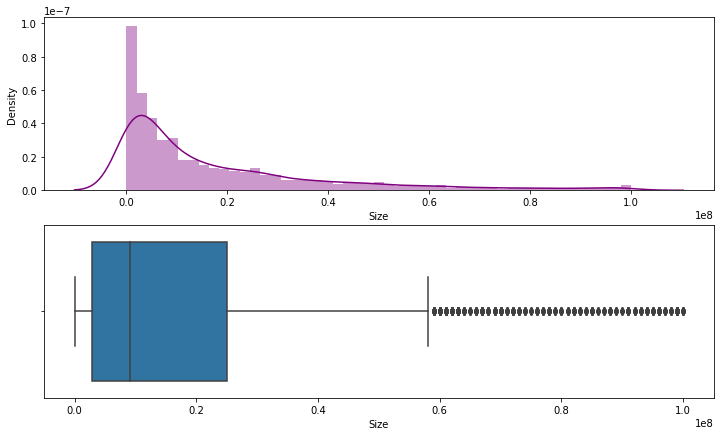

In [54]:
# Distplot
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(playSdata[playSdata['Size'] != 'Varies with device']['Size'], color='purple', ax=ax[0]);
sns.boxplot(x='Size',data=playSdata, ax=ax[1]);

In [46]:
# Changing the size column values in numeric values
playSdata['Size'] = playSdata['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playSdata['Size'] = pd.to_numeric(playSdata['Size'].map(lambda x: reamove(x)))

##*Now we will handle the duplicates in App column. Because in column app having number of duplicates which are not necessary in data.*

In [47]:
playSdata['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

##*Above we will remove these duplicates from App*

In [48]:
playSdata.drop_duplicates(subset='App',inplace=True)

## *Changing the datatype of the `Last Updated` column from string to datetime.*

In [49]:
# Pandas to_datetime() function applied to the values in the last updated column helps to convert string Date time into Python Date time object.

playSdata["Last_Updated"] = pd.to_datetime(playSdata['Last_Updated'])
playSdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


##*Finally, I have clean the all data whatever was garbage in our data. Now will see the summary stats after cleaning our data.*

In [50]:
playSdata.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9.659000e+03,9659.000000
mean,4.192442,2.165926e+05,1.780444e+07,7.777507e+06,1.099299
std,0.496397,1.831320e+06,2.149524e+07,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,2.900000e+06,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,9.100000e+06,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,2.500000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [51]:
playSdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9659 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   int64         
 5   Installs        9659 non-null   int64         
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content_Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last_Updated    9659 non-null   datetime64[ns]
 11  Current_Ver     9659 non-null   object        
 12  Android_Ver     9659 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 1.0+ MB


In [ ]:
playSdata.shape

(9659, 13)

## *We have successfully converted the datatype of the values in the Reviews column from string to int.*

## *Now that we have handled the errors and NaN values in the playstoredata.csv file, lets do the same for the userreviews.csv file.*

#**Exploratory Data Analysis (EDA)**

##*So, let's begin by importing the `matplolib.pyplot` and `seaborn` and also we will fix the plot size, font size and all.*

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##*we will get insights and learn the trends, pattern and answers of each questions which we are created to explore the data*

###***1) Can we see what are the pinnacle classes withinside the play store, which includes the best wide variety of apps by Category?***

In [ ]:
y = playSdata['Category'].value_counts().index
x = playSdata['Category'].value_counts()
x_range = []
y_range = []
for i in range(len(x)):
    x_range.append(x[i])
    y_range.append(y[i])

###*Here We have defined x axis and y axis*

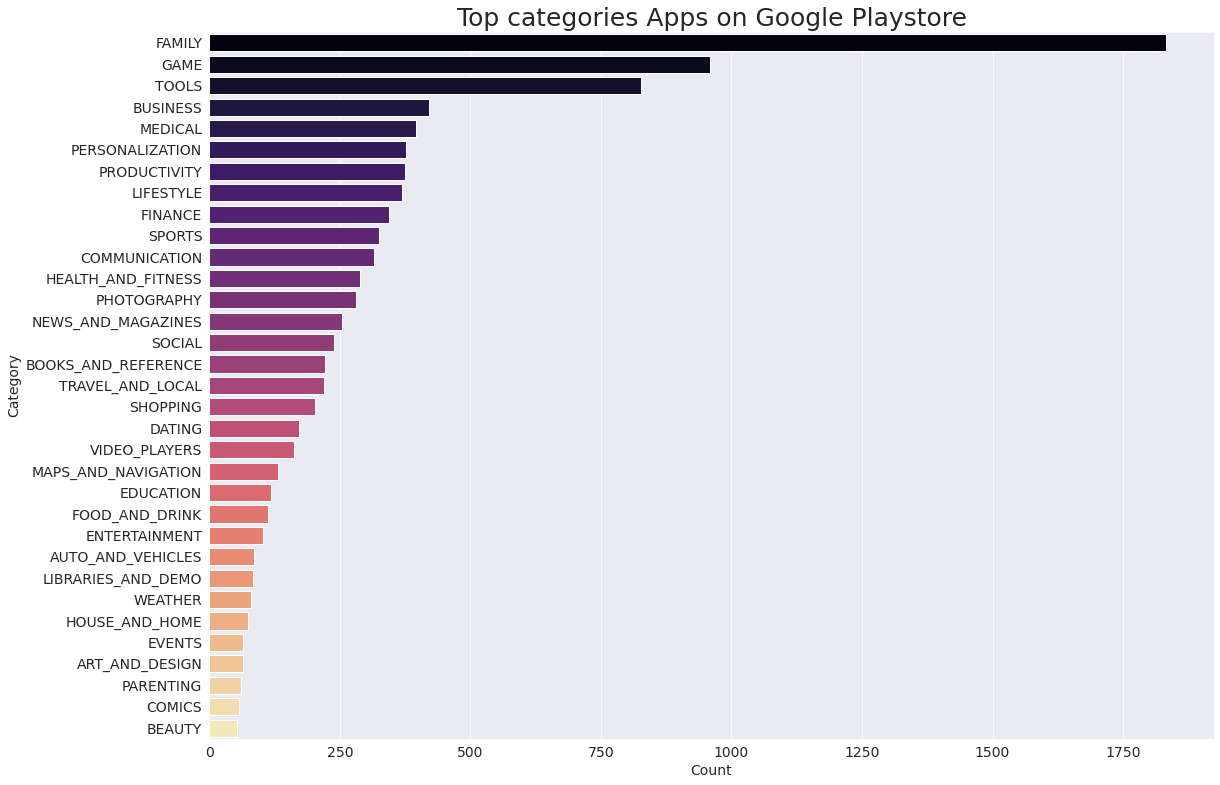

In [ ]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = x_range, y = y_range, palette= "magma")
graph.set_title("Top categories Apps on Google Playstore", fontsize = 25);

###*from above plot we can see that there are almost 33 categories. In this plot topmost are `FAMILY` and `GAMES` and least are `COMICS` and `BEAUTY` Category are present.*

###***2) How the Ratings are given and distributed by people between 1-5 ?***

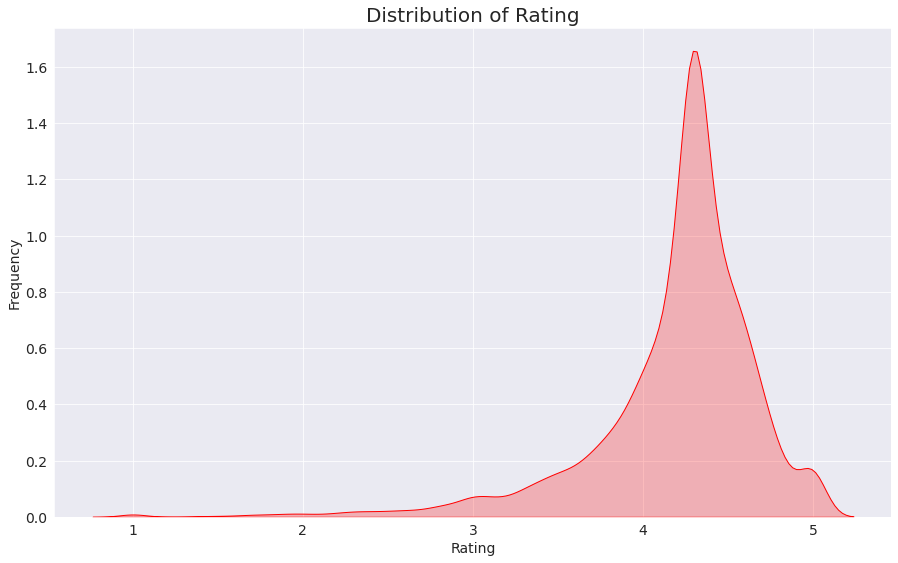

In [ ]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(playSdata.Rating, color="Red", shade = True)
plt.title('Distribution of Rating',size = 20);

###*Above the conclusion is that most of the people have given Ratings between `3.5 to 4.8`*

##***3) In dataframe of PlayStore how many percentage of apps are paid and how many percentage of apps are free ?***

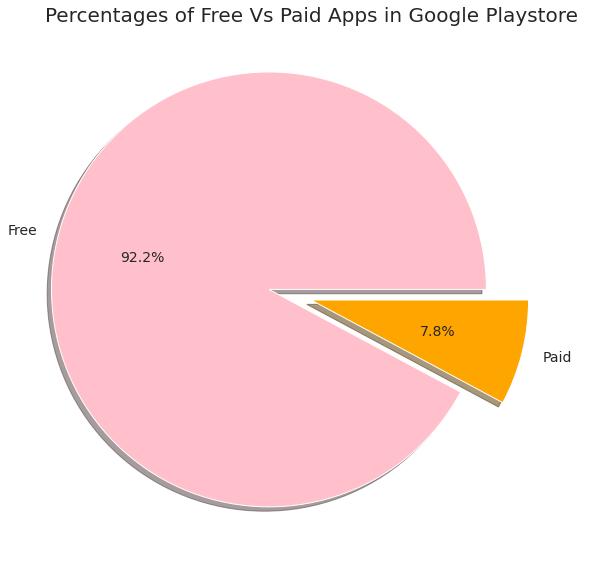

In [ ]:
plt.figure(figsize=(10,10))
labels = playSdata['Type'].value_counts(sort = True).index
sizes = playSdata['Type'].value_counts(sort = True)
colors = ["pink","orange"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percentages of Free Vs Paid Apps in Google Playstore',size = 20)
plt.show()

###*In above Pie Chart We can see that in playstore there are almost `92.8%` are Free Apps and least are `7.8%`*

###***4) Which are the top 10 most installed Apps in any `category` ?***

In [ ]:
def top10catapp(str):
    str = str.upper()
    top10 = playSdata[playSdata['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

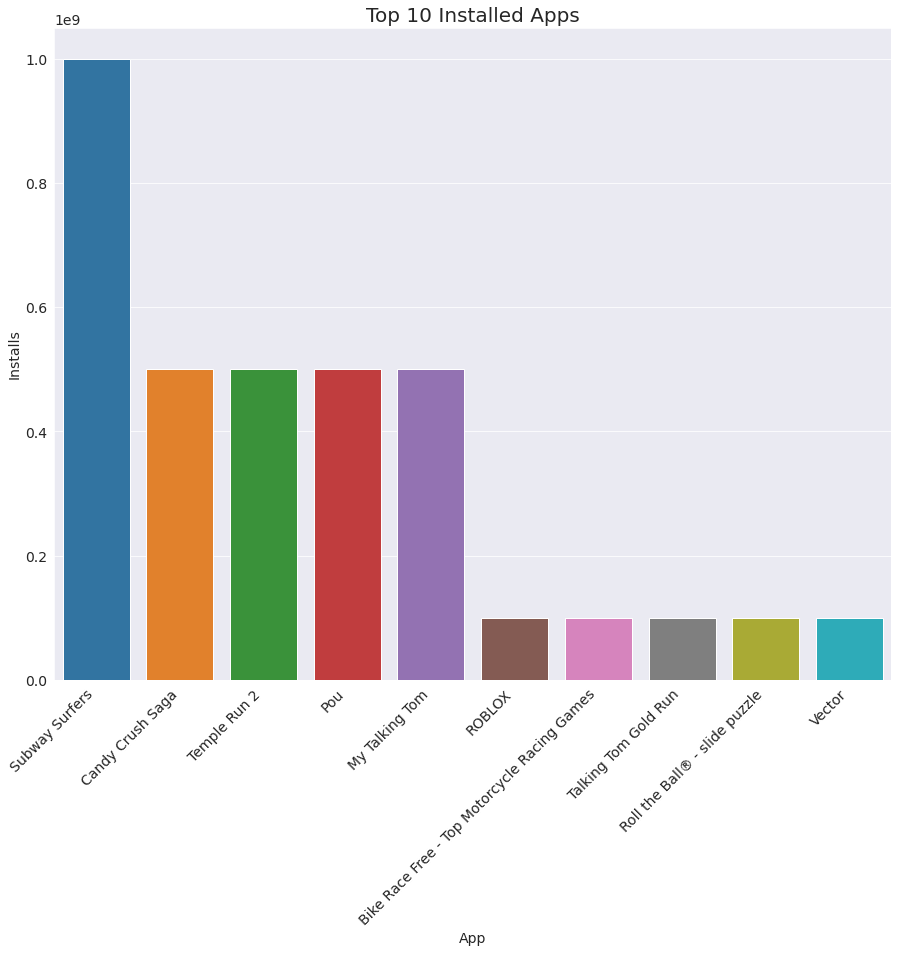

In [ ]:

top10catapp('GAME')

###***5) Which are the `Apps` Having the highest `Reviews` ?***

In [ ]:
Highest_review_apps = playSdata.sort_values(by="Reviews",ascending=False)

In [ ]:
Highest_review_apps.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2544,Facebook,SOCIAL,4.1,78158306,0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,0,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723,98000000,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,0,500000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76000000,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,0,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,0,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
1660,Clash Royale,GAME,4.6,23133508,97000000,100000000,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up


###*From above we can see that Apps like `Facebook,whatsapp,messenger,instagram` and `Clean Master- Space Cleaner & Antivirus` having highest number of Reviews given by users.*

##***6) Which are the apps which have made the highest-incomes in playstore ?***

###*For answering those questions we will carry out a few greater operation to the data frame, i.e., we can want to create a separate data frame, after which multiply the Price column and the Installs column to be able to get the incomes of any unique app. So, let's begin the process.*

In [ ]:
get_paid_apps = playSdata[playSdata['Type'] == 'Paid']

###*Now from the above records frame, we can want to split out the columns which we will require.*

In [ ]:
high_income = playSdata[['App','Installs','Price']]

###*Now multiplying by two columns `price` and `installs` we will create new column `incomes`*

In [ ]:
high_income['Incomes'] =  high_income['Installs'] * high_income['Price'];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


###*Now let us sort the above data by Earnings and Price .*

In [ ]:
earning_df_sorted_by_Earnings = high_income.sort_values(by='Incomes', ascending=False).head(50)

In [ ]:
earning_df_sorted_by_Earnings.head(10)

,App,Installs,Price,Incomes
2241,Minecraft,10000000,6.99,69900000.0
5351,I am rich,100000,399.99,39999000.0
5356,I Am Rich Premium,50000,399.99,19999500.0
4034,Hitman Sniper,10000000,0.99,9900000.0
7417,Grand Theft Auto: San Andreas,1000000,6.99,6990000.0
2883,Facetune - For Free,1000000,5.99,5990000.0
5578,Sleep as Android Unlock,1000000,5.99,5990000.0
8804,DraStic DS Emulator,1000000,4.99,4990000.0
4367,I'm Rich - Trump Edition,10000,400.00,4000000.0
4362,💎 I'm rich,10000,399.99,3999900.0


In [ ]:
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)

###*Finally, we can plot the graph and find out which are the apps with the highest number of earnings.*

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


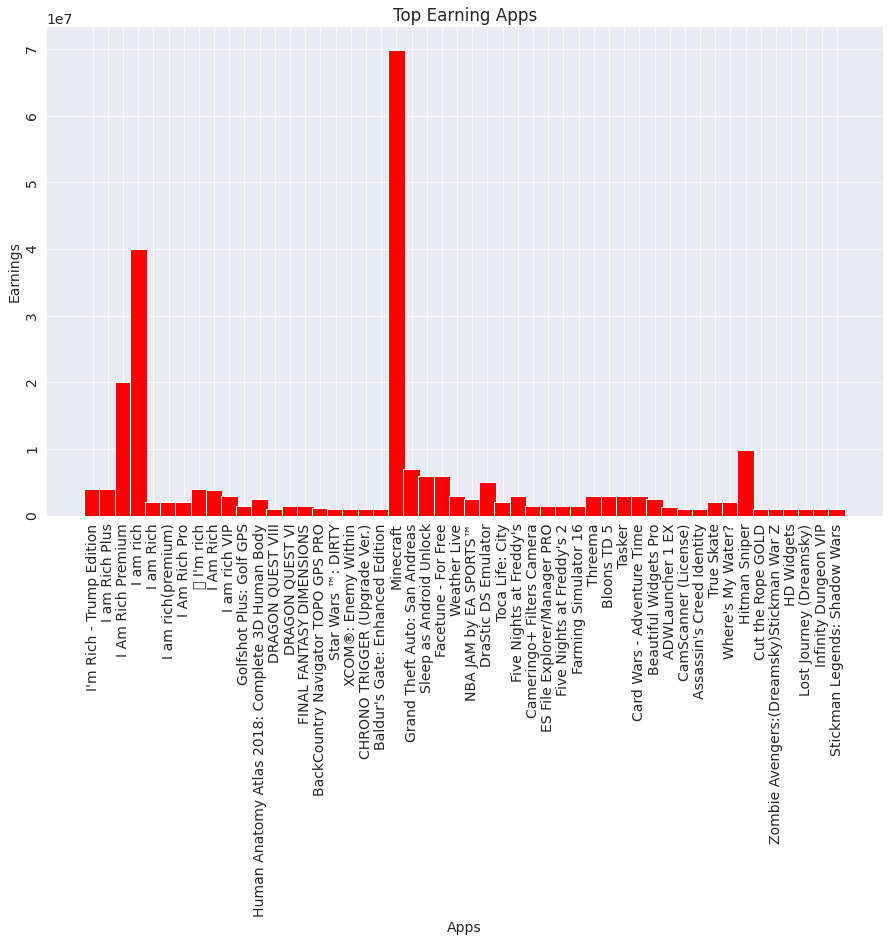

In [ ]:
# PLot a bar chart of earning at y and app names at x
plt.figure(figsize=(15,9))
plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Incomes, width=1.1, label=earning_df_sorted_by_Price.Incomes,color='r')
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

##*Top 10 Earning Apps are below in Google -:*



```
1)  Minecraft	
2)	I am rich
3)	I Am Rich Premium	
4)	Hitman Sniper	
5)	Grand Theft Auto: San Andreas	
6)	Facetune - For Free
7)	Sleep as Android Unlock	
8)	DraStic DS Emulator	
9)	I'm Rich - Trump Edition
10)	💎 I'm rich
```



# **Inferences and Conclusion**
## *After Analyzing the dataset I have got answers to some of the serious & interesting question which any of the android users would love to know.*

##1) Can we see what are the pinnacle classes withinside the play store, which includes the best wide variety of apps by Category?

##2) How the Ratings are given and distributed by people between 1-5 ?

##3) In dataframe of PlayStore how many percentage of apps are paid and how many percentage of apps are free ?

##4) Which are the top 10 most installed Apps in any category ?

##5) Which are the Apps Having the highest Reviews ?

##6) Which are the apps which have made the highest-incomes in playstore ?